In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/Timeseries-365/Index2018/Index2018.csv")
data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


#### stock market data from different countries like USA, Germany, UK, Japan where minimum of ftse is grater than spx company

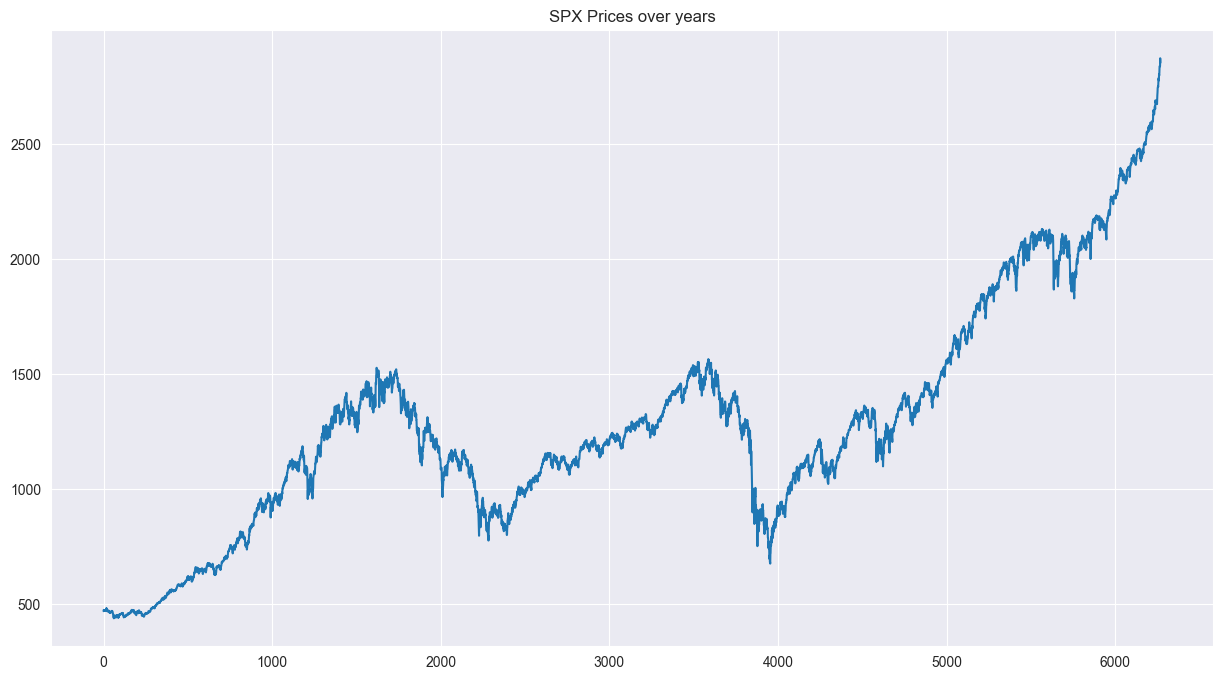

In [4]:
data.spx.plot(figsize=(15,8),title='SPX Prices over years')
plt.show()

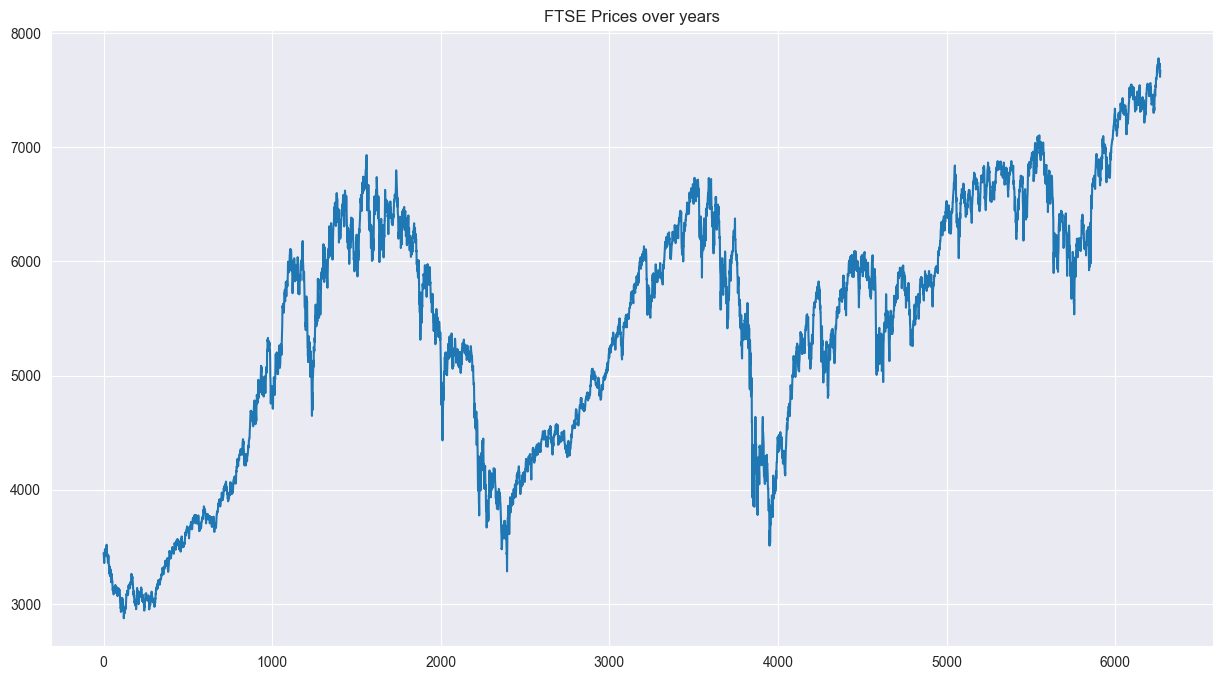

In [5]:
data.ftse.plot(figsize=(15,8),title='FTSE Prices over years')
plt.show()

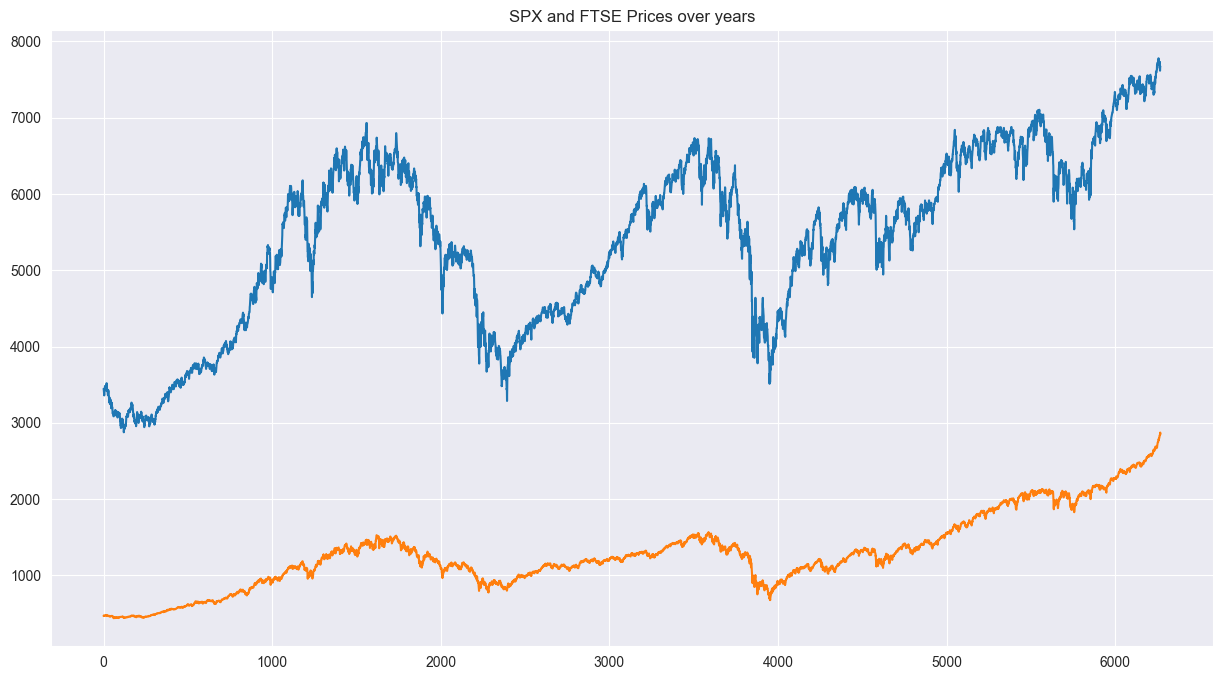

In [6]:
data.ftse.plot(figsize=(15,8),title='FTSE Prices over years')

data.spx.plot(figsize=(15,8),title='SPX Prices over years')
plt.title('SPX and FTSE Prices over years')
plt.show()

### Quantile-Quantile Plot (QQ plot) :
##### use it to determine whether a dataset is distributed a certain way
##### usually showcases how the data fits a normal distribution

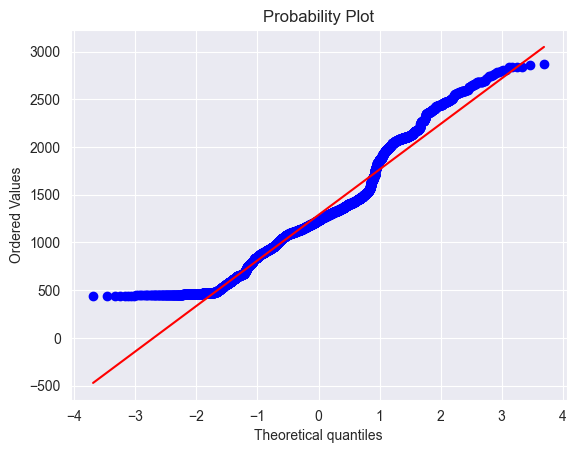

In [7]:
import scipy.stats
import pylab

scipy.stats.probplot(data.spx, plot=pylab)
pylab.show()

#### y-axis : show the prices
#### x-axis: how many stds away from the mean these values are
#### the red line means to be normally distributed they have to follow red line ( here it's not normally distributed since the blue line bottom side has more data which away from the red line

In [8]:
data.date = pd.to_datetime(data.date, dayfirst=True)
data.head(5)

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [9]:
print('lowest date :',data['date'].min())
print('latest date :',data['date'].max())

lowest date : 1994-01-07 00:00:00
latest date : 2018-01-29 00:00:00


In [10]:
data.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [11]:
#setting date column as index
data.set_index('date', inplace=True)

In [12]:
#setting desired frequency
data = data.asfreq('d')
data.head(5)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


##### by using asfreq we have created new dates/periods which don't have associated values with them

In [13]:
data = data.asfreq('b') #b=business days
data.head(5)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


##### when we put 'd' as frequency we have seen there are missing values for those days which actually were weekends and that's why used 'b' which only counts working days

In [14]:
data.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [15]:
data = data.fillna(data.mean())
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

##### now we do not have missing values in the dataset

In [16]:
#copying spx value and dropping all the columns for fast working way

data['spx_value'] = data['spx']
data = data.drop(columns=['spx','ftse','dax','nikkei'],axis=1)
data.head(5)

,spx_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


### train test split

In [17]:
size = int(len(data)*0.8)
train_df = data.iloc[:size]
test_df = data.iloc[size:]

In [18]:
train_df.tail(4)

,spx_value
date,
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [19]:
test_df.head(4)

,spx_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863


#### white noise : a special type of time series where the data does not follow a pattern. It has 3 conditions which are 1) constant mean 2)constant variance 3)no autocorrelation between any periods [ means no clear relationship between past & present values]

In [20]:
#creating white noise by taking equivalent mean and variance with same size of desired data
#loc will create same number avg. points distribution value where scale will tell how wide the data will be.

wn = np.random.normal(loc=train_df.spx_value.mean(), scale = train_df.spx_value.std(), size=len(train_df))
train_df['wn'] = wn
train_df.describe()

,spx_value,wn
count,5021.000000,5021.000000
mean,1091.699647,1092.350518
std,292.513165,292.579073
min,438.920000,52.948640
25%,914.835752,895.857342
50%,1144.726185,1094.093639
75%,1316.004350,1286.430113
max,1570.252238,2077.899096


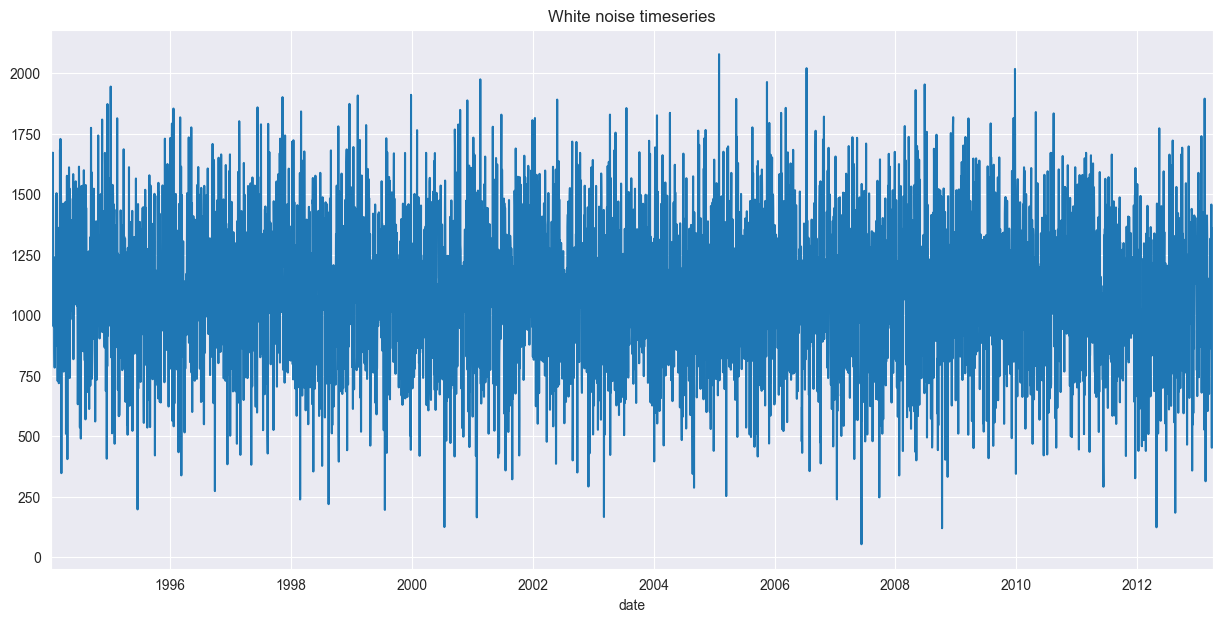

In [21]:
train_df.wn.plot(title='White noise timeseries', figsize=(15,7))
plt.show()

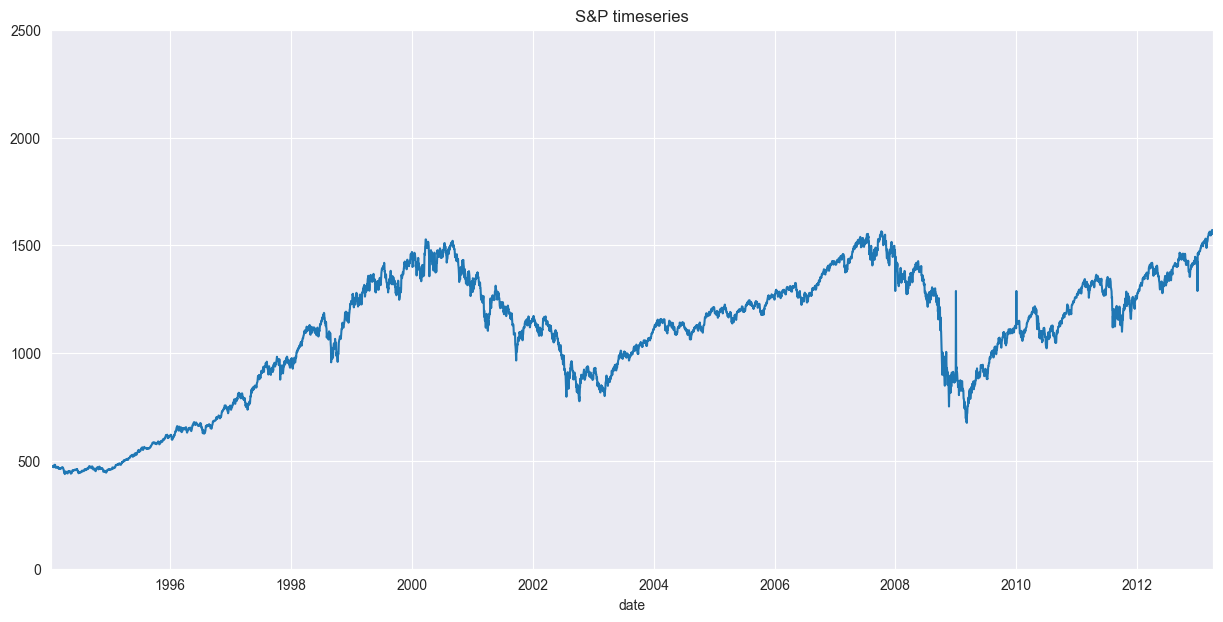

In [22]:
train_df.spx_value.plot(title='S&P timeseries', figsize=(15,7))
plt.ylim(0, 2500)
plt.show()

#### Random walk : a special type of time-series, where values tend to persist over time and the differences between periods are simply white noise

In [23]:
rw_df = pd.read_csv('D:/Timeseries-365/RandWalk/RandWalk.csv')
rw_df.date = pd.to_datetime(rw_df.date, dayfirst=True)
rw_df.set_index('date', inplace=True)
rw_df = rw_df.asfreq('b')
rw_df.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [24]:
train_df['rw'] = rw_df.price
df = train_df.copy()
df.head(3)

,spx_value,wn,rw
date,,,
1994-01-07,469.90,1538.093289,1122.139662
1994-01-10,475.27,796.768276,1080.347860
1994-01-11,474.13,1226.857125,1082.095245


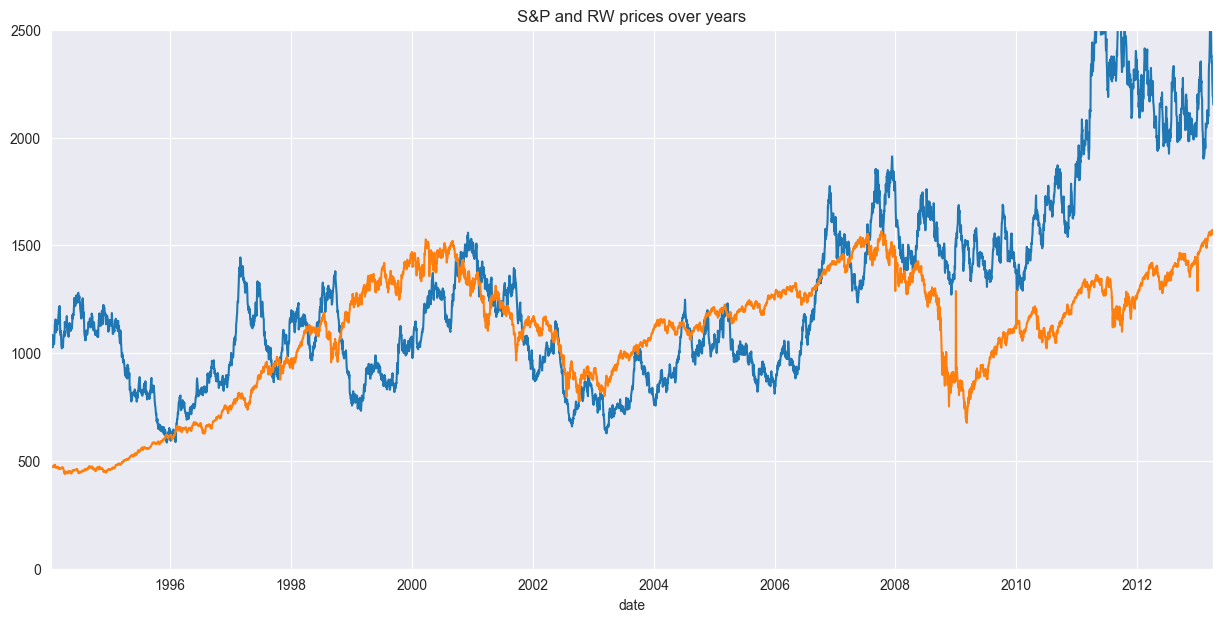

In [25]:
df.rw.plot(figsize=(15,7))
df.spx_value.plot()
plt.title('S&P and RW prices over years')
plt.ylim(0, 2500)
plt.show()

### Observations :
#### small variations between consecutive time periods
#### cyclical increases and decreases in short periods of time
##### note: if a time series resembles random walk the forcast can not be predicted with great accuracy

### Dickey-Fuller test : stationary or not?

In [26]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

sts.adfuller(data)

(1.1191300249839764,
 0.99537662766783,
 10,
 6266,
 {'1%': -3.4313940441948807,
  '5%': -2.8620013751563964,
  '10%': -2.567015587023998},
 60760.017201588766)

#### observations:
##### T-statistics(upper one): since this value is greater than critical values(1%,5%,10%) so we do not have sufficient evidence of stationary T in the dataset.
##### P-value(second one) : the p-value suggests that 99% chance( not rejecting the null) the data comes from a non stationary process
##### third-value : it represents number of lags used in the regression when determining the T statistics.
##### 4th-value : it expresses the num of observations used in the analysis
##### last-value : estimates the maximized information criteria provided there is some apparent auto correlation.The lower the values, the easier it is to make predictions for the future

In [27]:
sts.adfuller(df.wn)

(-71.33300807303682,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70821.79188834244)

In [28]:
sts.adfuller(df.rw)

(-1.3286073927689734,
 0.6159849181617376,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

#### Seasonality : can be decomposed into 3 terms -
##### Trend : pattern, 
##### Seasonal : Cyclical effects, 
##### Residual : Error of predictions or the difference between the actual data and the model we fit

#### 'Naive' decomposition :
##### additive : trend + seasonal + residual
##### multiplicative : trend * seasonal * residual

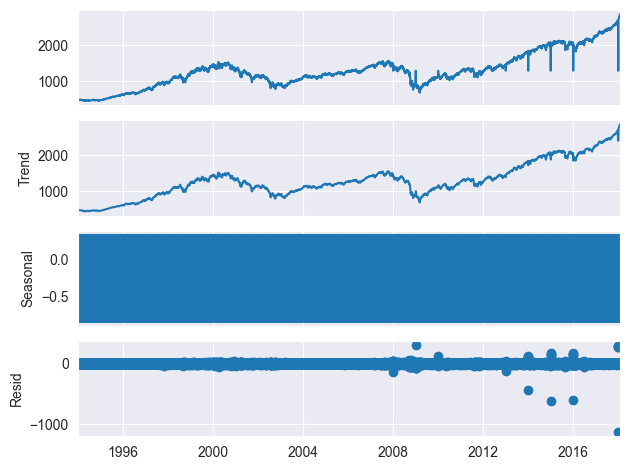

In [29]:
s_dec_add = seasonal_decompose(data, model ="additive")
s_dec_add.plot()
plt.show()

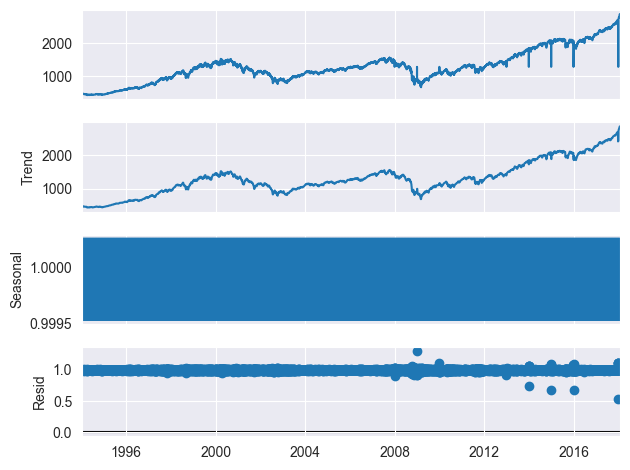

In [30]:
s_dec_mul = seasonal_decompose(data, model ="multiplicative")
s_dec_mul.plot()
plt.show()

#### Correlation : measures the similarity in the change of values of two series
#### auto-correlation : the correlation between a sequence and itself

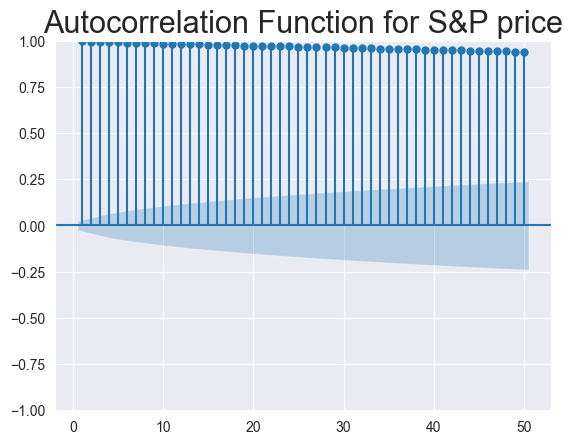

In [31]:
sgt.plot_acf(data, lags=50, zero=False) # lags 50 means last 50 periods before the current one ## zero argument means do we want to add current period values in the graph for correlation functions
plt.title('Autocorrelation Function for S&P price', size=22)
plt.show()

##### x-axis : represents number of lags
##### y-axis : represents the possible values for the auto correlation coefficient
##### as the lags getting bigger the auto correlation not persists.(the lower deep color which expands as lags number increased) 

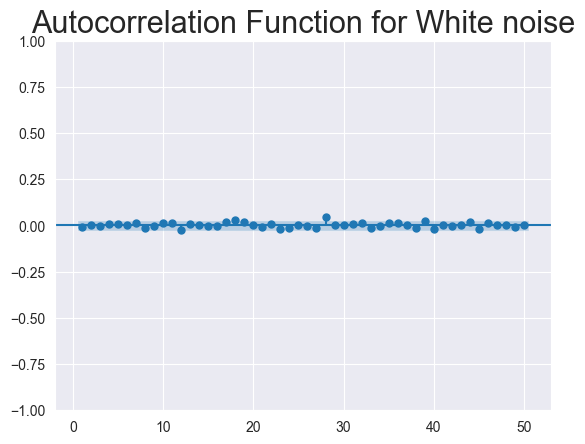

In [32]:
sgt.plot_acf(df.wn, lags=50, zero=False)
plt.title('Autocorrelation Function for White noise', size=22)
plt.show()

#### comment : there is no auto correlation for any lag

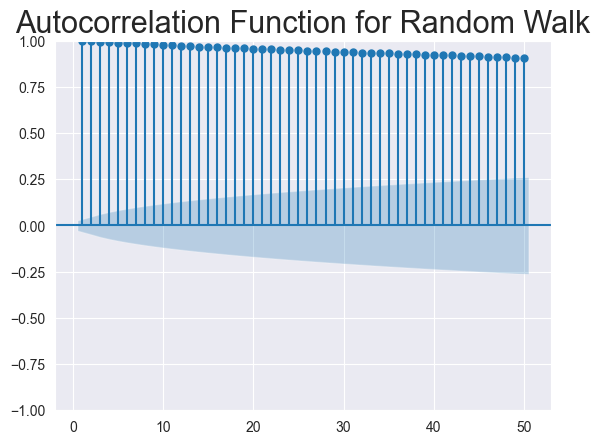

In [33]:
sgt.plot_acf(df.rw, lags=50, zero=False) 
plt.title('Autocorrelation Function for Random Walk', size=22)
plt.show()

#### Partial Auto correlation Function (PACF):

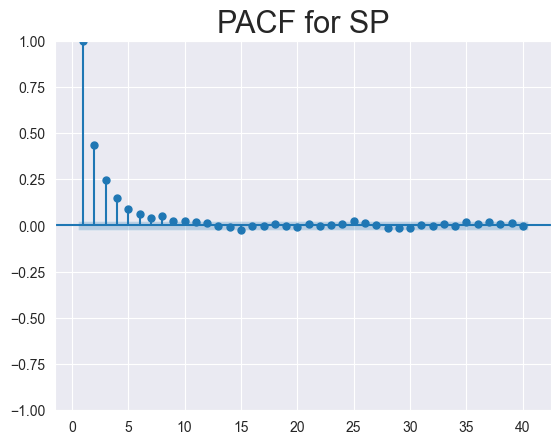

In [34]:
sgt.plot_pacf(data, lags=40, zero=False, method=('ols')) #ols = order of least squares
plt.title('PACF for SP', size=22)
plt.show()

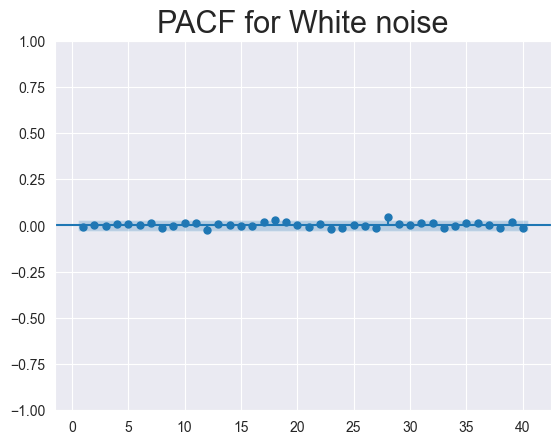

In [35]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols')) 
plt.title('PACF for White noise', size=22)
plt.show()

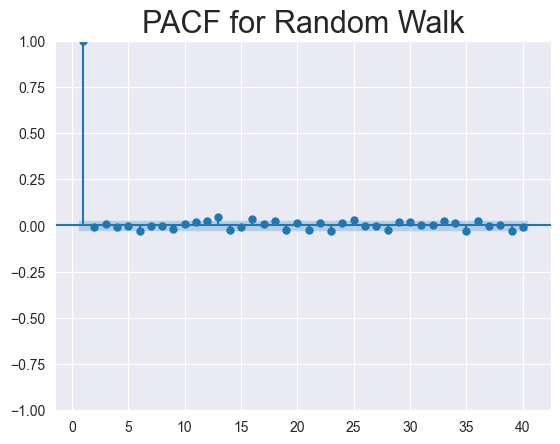

In [36]:
sgt.plot_pacf(df.rw, lags=40, zero=False, method=('ols'))
plt.title('PACF for Random Walk', size=22)
plt.show()

## Model Selection

#### Autoregressive Model (AR):
##### a linear model, where current period values are a sum of past outcomes multiplied by a numeric factor.

#### before apply the model we need to determine the number of appropriate number of lags (by using acf & pacf)

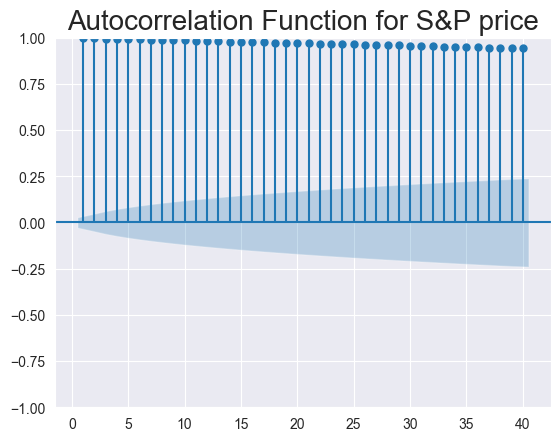

In [37]:
sgt.plot_acf(df.spx_value, lags=40, zero=False)
plt.title('Autocorrelation Function for S&P price', size=20)
plt.show()

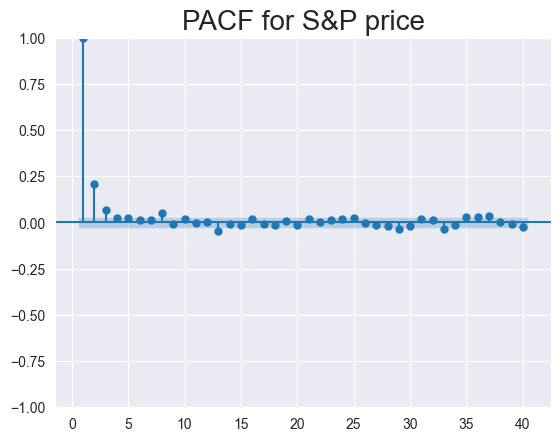

In [38]:
sgt.plot_pacf(df.spx_value, lags=40, zero=False, alpha=0.05,method=('ols'))
plt.title('PACF for S&P price', size=20)
plt.show()

#### points : vastly from 25 lags and onwards are close to zero so this impact on the model is minimal as they are not relevant to us


In [39]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

In [40]:
model_ar = ARIMA(df.spx_value, order=(1,1,0))  #We’ll employ the ARIMA(1,1,0) configuration:
##1 lags for autoregression (AR)
##1st order differencing (I)
##No moving average term (MA)
result_ar = model_ar.fit()

In [41]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              spx_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -20982.490
Date:                Wed, 20 Nov 2024   AIC                          41968.981
Time:                        13:40:46   BIC                          41982.023
Sample:                    01-07-1994   HQIC                         41973.551
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2102      0.002    -91.214      0.000      -0.215      -0.206
sigma2       250.0967      0.750    333.433      0.000     248.627     251.567
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):           2163760.75
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                       104.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Higher-Lag AR models:

In [42]:
model_ar_2 = ARIMA(df.spx_value, order=(5,1,0)) 
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              spx_value   No. Observations:                 5021
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -20968.146
Date:                Wed, 20 Nov 2024   AIC                          41948.293
Time:                        13:40:47   BIC                          41987.420
Sample:                    01-07-1994   HQIC                         41962.003
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2265      0.002    -92.559      0.000      -0.231      -0.222
ar.L2         -0.0742      0.007    -10.039      0.000      -0.089      -0.060
ar.L3         -0.0284      0.011     -2.515      0.012      -0.051      -0.006
ar.L4         -0.0256      0.011     -2.341      0.019      -0.047      -0.004
ar.L5         -0.0130      0.010     -1.274      0.203      -0.033       0.007
sigma2       248.8637      0.753    330.535      0.000     247.388     250.339
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2174695.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.87   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       104.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model_ar_3 = ARIMA(df.spx_value, order=(10,1,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              spx_value   No. Observations:                 5021
Model:                ARIMA(10, 1, 0)   Log Likelihood              -20959.729
Date:                Wed, 20 Nov 2024   AIC                          41941.459
Time:                        13:40:50   BIC                          42013.192
Sample:                    01-07-1994   HQIC                         41966.595
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2270      0.003    -89.202      0.000      -0.232      -0.222
ar.L2         -0.0761      0.007    -10.198      0.000      -0.091      -0.061
ar.L3         -0.0305      0.012     -2.652      0.008      -0.053      -0.008
ar.L4         -0.0284      0.011     -2.556      0.011      -0.050      -0.007
ar.L5         -0.0207      0.011     -1.822      0.068      -0.043       0.002
ar.L6         -0.0275      0.011     -2.434      0.015      -0.050      -0.005
ar.L7         -0.0515      0.011     -4.734      0.000      -0.073      -0.030
ar.L8          0.0053      0.011      0.492      0.622      -0.016       0.026
ar.L9         -0.0161      0.011     -1.443      0.149      -0.038       0.006
ar.L10         0.0015      0.011      0.134      0.893      -0.020       0.023
sigma2       247.7923      0.816    303.827      0.000     246.194     249.391
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2193757.50
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                             1.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       105.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [45]:
LLR_test(model_ar, model_ar_2, 15)

0.018

## Return
##### the % change between the values for two consecutive periods
##### positive returns indicates increasing the price
##### negative returns indicates decreasing the price

In [46]:
sts.adfuller(df.spx_value)

(-1.732534472275293,
 0.41443246911876996,
 12,
 5008,
 {'1%': -3.431656440695734,
  '5%': -2.862117305719603,
  '10%': -2.5670773004997116},
 41694.335822783585)

### based on assumption 5% of significance level
##### the p value(.4) says that the data comes from stationary process
##### and suggests we should not rely on AR models to make accurate forecasts

In [47]:
df['returns'] = df.spx_value.pct_change(1).mul(100)
##pct_chnage(1) returns percentage change between the current and prior element. actually means 'Distance in time between the periods we want to compare'.

In [48]:
df = df.iloc[1:]

In [49]:
sts.adfuller(df.returns)

(-12.144716268440632,
 1.6206543194028587e-22,
 31,
 4988,
 {'1%': -3.43166168173001,
  '5%': -2.8621196211801374,
  '10%': -2.5670785331097763},
 17802.875901501495)

#### decision : the test statistic(-12.14...) falls far to the left, even the 1% critical value. So we can say that the data comes from a stationary process

## ACF & PACF for Returns

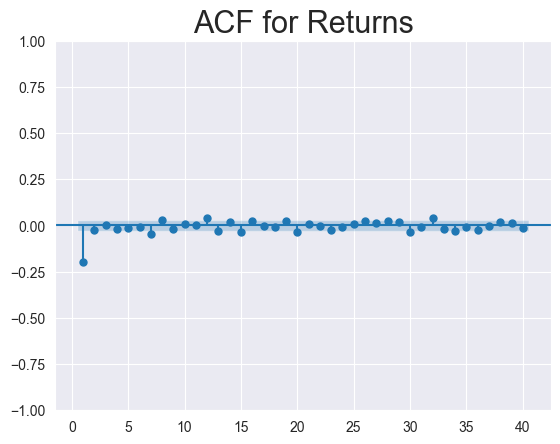

In [50]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title('ACF for Returns', size=22)
plt.show()

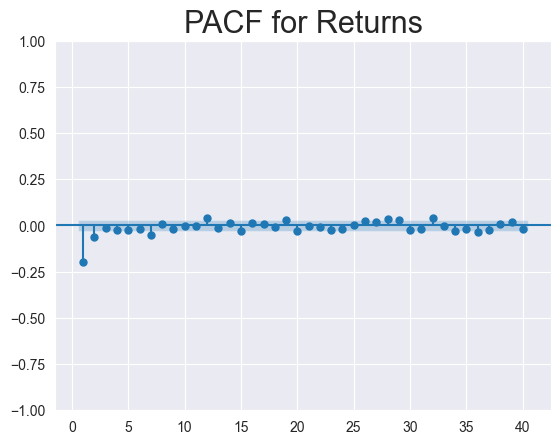

In [51]:
sgt.plot_pacf(df.returns, lags=40, zero=False, method=('ols'))
plt.title('PACF for Returns', size=22)
plt.show()

In [52]:
model_net_ar = ARIMA(df.returns, order=(1,1,0))
result_net_ar = model_net_ar.fit()
result_net_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -10253.844
Date:                Wed, 20 Nov 2024   AIC                          20511.688
Time:                        13:40:53   BIC                          20524.730
Sample:                    01-10-1994   HQIC                         20516.259
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5726      0.002   -288.882      0.000      -0.576      -0.569
sigma2         3.4835      0.011    320.932      0.000       3.462       3.505
===================================================================================
Ljung-Box (L1) (Q):                 257.06   Jarque-Bera (JB):           3769303.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.73   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                       137.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model_net_ar_2 = ARIMA(df.returns, order=(2,1,0))
result_net_ar_2 = model_net_ar_2.fit()
result_net_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -9828.218
Date:                Wed, 20 Nov 2024   AIC                          19662.436
Time:                        13:40:53   BIC                          19681.999
Sample:                    01-10-1994   HQIC                         19669.291
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7988      0.002   -380.477      0.000      -0.803      -0.795
ar.L2         -0.3949      0.004    -89.415      0.000      -0.404      -0.386
sigma2         2.9399      0.009    336.630      0.000       2.923       2.957
===================================================================================
Ljung-Box (L1) (Q):                  60.40   Jarque-Bera (JB):           3260430.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
LLR_test(model_net_ar, model_net_ar_2)

0.0

##### comment : the log liklihood is different and AIC, BIC, HQIC (information criteria) are lower in 2nd model(model_net_ar_2) so we have to reach a position where additional coefficient is insignicant by checking AIC/BIC not values.
#### The LLR test fails

In [55]:
model_net_ar_4 = ARIMA(df.returns, order=(4,1,0))
result_net_ar_4 = model_net_ar_4.fit()
print(result_net_ar_4.summary())
print('LLR test :' + str(LLR_test(model_net_ar_2, model_net_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -9504.382
Date:                Wed, 20 Nov 2024   AIC                          19018.764
Time:                        13:40:57   BIC                          19051.369
Sample:                    01-10-1994   HQIC                         19030.189
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9691      0.002   -462.601      0.000      -0.973      -0.965
ar.L2         -0.7514      0.005   -143.310      0.000      -0.762      -0.741
ar.L3         -0.4759      0.007    -66.091      0.0

In [56]:
model_net_ar_5 = ARIMA(df.returns, order=(5,1,0))
result_net_ar_5 = model_net_ar_5.fit()
print(result_net_ar_5.summary())
print('LLR test :' + str(LLR_test(model_net_ar_4, model_net_ar_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9418.195
Date:                Wed, 20 Nov 2024   AIC                          18848.389
Time:                        13:41:01   BIC                          18887.515
Sample:                    01-10-1994   HQIC                         18862.100
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0093      0.002   -475.923      0.000      -1.013      -1.005
ar.L2         -0.8389      0.006   -150.535      0.000      -0.850      -0.828
ar.L3         -0.6140      0.008    -73.713      0.0

In [57]:
model_net_ar_6 = ARIMA(df.returns, order=(6,1,0))
result_net_ar_6 = model_net_ar_6.fit()
print(result_net_ar_6.summary())
print('LLR test :' + str(LLR_test(model_net_ar_5, model_net_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -9377.902
Date:                Wed, 20 Nov 2024   AIC                          18769.803
Time:                        13:41:07   BIC                          18815.450
Sample:                    01-10-1994   HQIC                         18785.799
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0325      0.002   -480.998      0.000      -1.037      -1.028
ar.L2         -0.8890      0.006   -152.896      0.000      -0.900      -0.878
ar.L3         -0.6916      0.009    -76.324      0.0

In [58]:
model_net_ar_7 = ARIMA(df.returns, order=(7,1,0))
result_net_ar_7 = model_net_ar_7.fit()
print(result_net_ar_7.summary())
print('LLR test :' + str(LLR_test(model_net_ar_6, model_net_ar_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -9307.361
Date:                Wed, 20 Nov 2024   AIC                          18630.722
Time:                        13:41:11   BIC                          18682.890
Sample:                    01-10-1994   HQIC                         18649.002
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0535      0.002   -479.206      0.000      -1.058      -1.049
ar.L2         -0.9408      0.006   -155.610      0.000      -0.953      -0.929
ar.L3         -0.7753      0.009    -81.726      0.0

#### Normalizing values

In [59]:
#since ARIMA model works with stationary data so we will follow this process

benchmark = df.spx_value.iloc[0]
df['norm'] = df.spx_value.div(benchmark).mul(100)
sts.adfuller(df.norm) #we will again check p values by df test

(-1.7308641819548727,
 0.41528455788974517,
 12,
 5007,
 {'1%': -3.431656701752533,
  '5%': -2.862117421053178,
  '10%': -2.5670773618962612},
 26140.373215908636)

#### comment : since non-normalized and normalized data give high p-values which suggest non-stationary.
### So normalizing the prices did not result in stationary data that's why we can not AR model with normalized prices

In [60]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.144716268440801,
 1.620654319401463e-22,
 31,
 4988,
 {'1%': -3.43166168173001,
  '5%': -2.8621196211801374,
  '10%': -2.5670785331097763},
 62403.531885444165)

#### comment : normalizing does not affect stationary

In [61]:
model_norm_ret_ar_2 = ARIMA(df.norm_ret, order=(2,1,0))
result_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
result_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -32271.627
Date:                Wed, 20 Nov 2024   AIC                          64549.254
Time:                        13:41:15   BIC                          64568.817
Sample:                    01-10-1994   HQIC                         64556.110
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7988      0.002   -380.382      0.000      -0.803      -0.795
ar.L2         -0.3950      0.004    -89.414      0.000      -0.404      -0.386
sigma2      2.252e+04     66.913    336.526      0.000    2.24e+04    2.26e+04
===================================================================================
Ljung-Box (L1) (Q):                  60.38   Jarque-Bera (JB):           3260095.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.12   Skew:                             1.18
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
model_norm_ret_ar_7 = ARIMA(df.norm_ret, order=(7,1,0))
result_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
result_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -31750.770
Date:                Wed, 20 Nov 2024   AIC                          63517.540
Time:                        13:41:16   BIC                          63569.708
Sample:                    01-10-1994   HQIC                         63535.820
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0533      0.002   -478.608      0.000      -1.058      -1.049
ar.L2         -0.9405      0.006   -155.356      0.000      -0.952      -0.929
ar.L3         -0.7749      0.009    -81.573      0.000      -0.794      -0.756
ar.L4         -0.6174      0.013    -47.576      0.000      -0.643      -0.592
ar.L5         -0.4589      0.012    -38.436      0.000      -0.482      -0.435
ar.L6         -0.2979      0.011    -27.498      0.000      -0.319      -0.277
ar.L7         -0.1664      0.009    -19.104      0.000      -0.183      -0.149
sigma2      1.831e+04     47.256    387.496      0.000    1.82e+04    1.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.02   Jarque-Bera (JB):           4157575.16
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                             3.72
Prob(H) (two-sided):                  0.00   Kurtosis:                       143.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### so we can suspect the same model that failed for regular returns would also fail for normalized returns.
##### since normalized and non-normalized coefficients value are exact same so we can conclude it
### 'Using normalized values has no impact on model selection'

### Analysing Residuals :

In [68]:
df['res_price'] = result_ar_3.resid
print('mean of residuals :',df.res_price.mean())
print('variance of the residuals :',df.res_price.var())
sts.adfuller(df.res_price)

mean of residuals : 0.3180976393179041
variance of the residuals : 247.74211989309774


(-70.86228924330624,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 41677.59611268445)

#### comment :
##### low mean value suggests model is performing well b
##### the p value is 0 so the data stationary

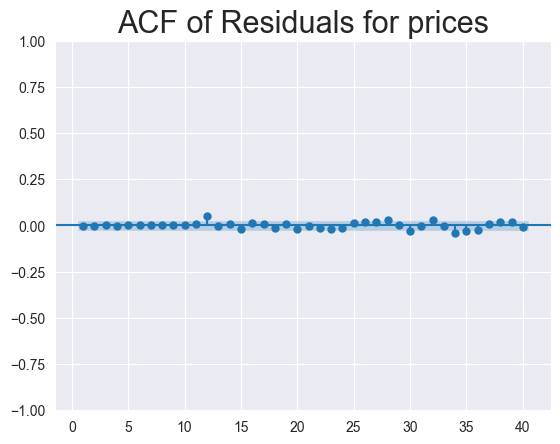

In [69]:
sgt.plot_acf(df.res_price, lags=40, zero=False)
plt.title('ACF of Residuals for prices', size=22)
plt.show()

####  most of the points significantly not different from zero which fits the characteristics of white noise

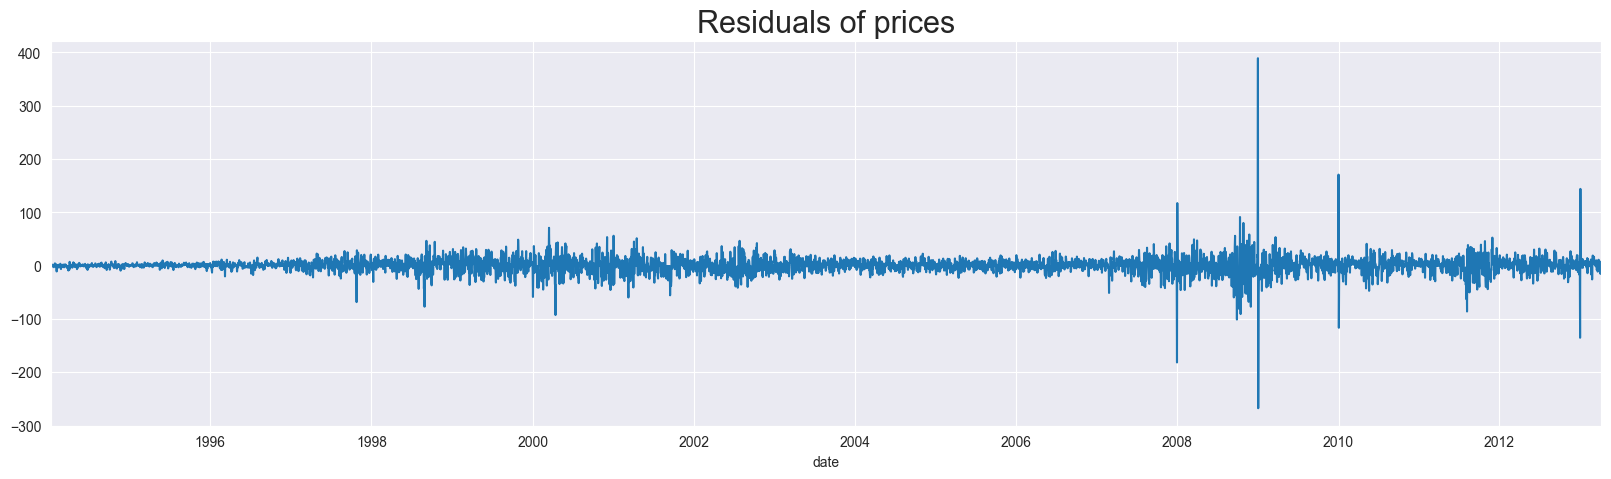

In [70]:
df.res_price[1:].plot(figsize=(20,5))
plt.title('Residuals of prices', size=22)
plt.show()

##### it's completely different from the original one(FSTE prices graph). Here we can not see any kind real pattern for the data so model choice seems correct.(we are using AR model for non-stationary data)

In [71]:
df['res_ret'] = result_net_ar_6.resid
print('mean of residual for return :',df.res_ret.mean())
print('variance of residual for return :',df.res_ret.var())
sts.adfuller(df.res_ret)

mean of residual for return : -0.0005030773141517994
variance of residual for return : 2.4571419617097394


(-19.37193006961181,
 0.0,
 31,
 4988,
 {'1%': -3.43166168173001,
  '5%': -2.8621196211801374,
  '10%': -2.5670785331097763},
 17951.025247535377)

#### mean is close to 0 and var is near to 2 indicate the chosen model was pretty good.
##### we can confirm the data is stationary by seeing p value is 0

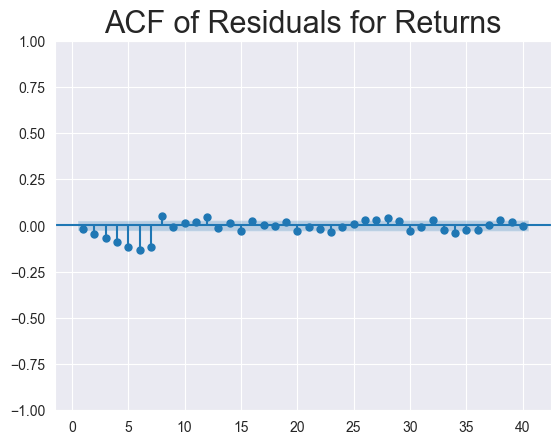

In [72]:
sgt.plot_acf(df.res_ret, lags=40, zero=False)
plt.title('ACF of Residuals for Returns', size=22)
plt.show()

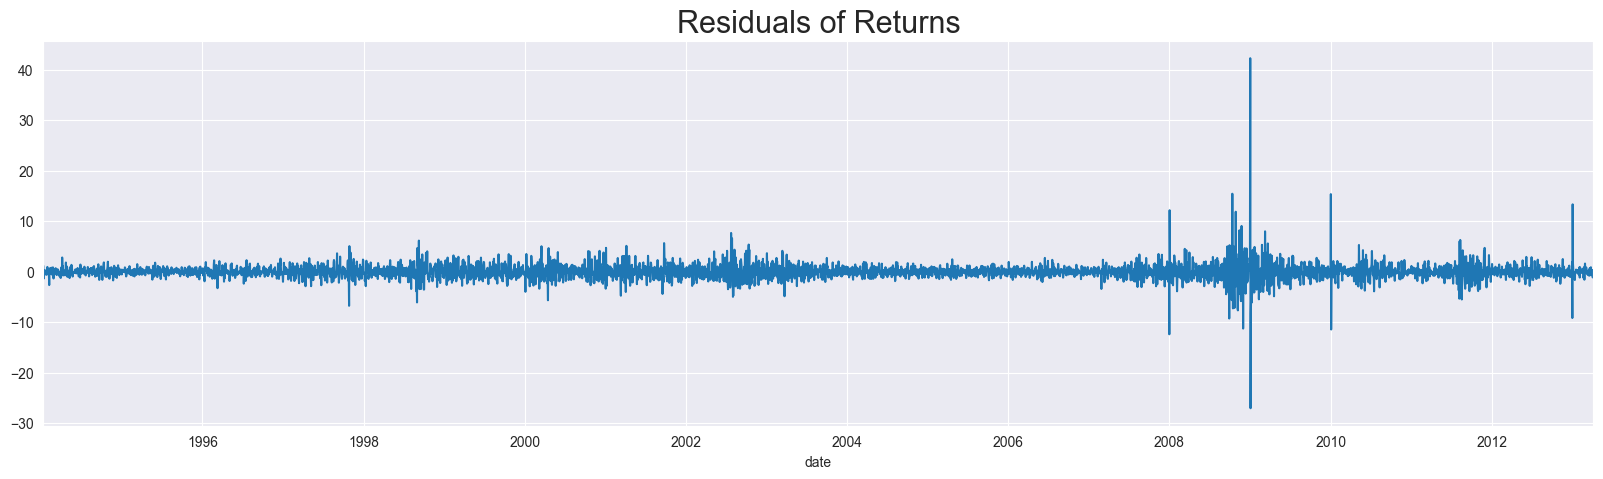

In [73]:
df.res_ret.plot(figsize=(20,5))
plt.title('Residuals of Returns', size=22)
plt.show()

# Thanks